<a href="https://colab.research.google.com/github/emmex2000/Applied-Statistics-Course-Work/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install easyimages

     |████████████████████████████████| 88 kB 3.1 MB/s 
  Created wheel for imutils: filename=imutils-0.4.6-py3-none-any.whl size=22841 sha256=35b6c108a31e8700ae2593f98917f06394577e021d598e6dddc433d4ba417756
  Stored in directory: /root/.cache/pip/wheels/87/ed/4c/fafff9aad7388bce2d6d6fce5cbd37277669ff397ce66d6570
Successfully built imutils
  Attempting uninstall: imutils
    Found existing installation: imutils 0.5.4
    Uninstalling imutils-0.5.4:
      Successfully uninstalled imutils-0.5.4


In [ ]:
import shutil
import urllib
import os
import pandas as pd
import numpy as np

In [ ]:
DIR = "drive/MyDrive/Thorax Disease Classification"
os.chdir(DIR)

In [ ]:
# #!/usr/bin/env python3
# # Download the zip files in Images_png in batches


# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	  'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	  'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
  	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
  	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
  	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
  	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
  	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading '+ fn +'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

In [ ]:
os.listdir()

['Data_Entry_2017_v2020.csv',
 'images_01.tar.gz',
 'images_02.tar.gz',
 'images_03.tar.gz',
 'images_04.tar.gz',
 'images_05.tar.gz',
 'images_06.tar.gz',
 'images_07.tar.gz',
 'images_08.tar.gz',
 'images_09.tar.gz',
 'images_10.tar.gz',
 'images_11.tar.gz',
 'images_12.tar.gz',
 'data',
 'Thorax_disease_classification.ipynb']

In [ ]:
# os.mkdir("data")

In [ ]:
# for idx, i in enumerate(os.listdir()):
#   if ".tar" in i:
#     print(idx)
#     shutil.unpack_archive(i, "data")

In [ ]:
#imgs_path = os.listdir("data/images")

In [ ]:
from random import sample

sample(imgs_path, 5)

['00017823_001.png',
 '00004168_004.png',
 '00012021_018.png',
 '00002498_000.png',
 '00013592_009.png']

In [ ]:
from easyimages import EasyImageList
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

# li = EasyImageList.from_folder("data/images")
# li.symlink_images()
# li.html(sample=10, size=44)

In [ ]:
df = pd.read_csv('Data_Entry_2017_v2020.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
df.shape

(112120, 11)

In [ ]:
columns = df["Finding Labels"].str.split("|", expand=True)
columns.sample(5)

,0,1,2,3,4,5,6,7,8
99725,Emphysema,Pneumothorax,None,None,None,None,None,None,None
32484,Effusion,Infiltration,Pneumonia,None,None,None,None,None,None
5089,No Finding,None,None,None,None,None,None,None,None
98738,No Finding,None,None,None,None,None,None,None,None
9197,No Finding,None,None,None,None,None,None,None,None


In [ ]:
df[(df["Finding Labels"] == "Pneumonia")].shape

(322, 11)

In [ ]:
df[(df["Finding Labels"] == "Pneumothorax")].shape

(2194, 11)

In [ ]:
df[(df["Finding Labels"] == "Effusion")].shape

(3955, 11)

In [ ]:
only = [322, 2194, 3955]

In [ ]:
no = df[(df["Finding Labels"] == "No Finding")].sample(6500)
no.shape

(6500, 11)

In [ ]:
pne = columns[((columns[0] == "Pneumonia") | 
               (columns[1] == "Pneumonia") |
               (columns[2] == "Pneumonia") |
               (columns[3] == "Pneumonia") |
               (columns[4] == "Pneumonia") |
               (columns[5] == "Pneumonia") |
               (columns[6] == "Pneumonia") |
               (columns[7] == "Pneumonia") |
               (columns[8] == "Pneumonia"))]
pne.head()

,0,1,2,3,4,5,6,7,8
73,Effusion,Pneumonia,Pneumothorax,None,None,None,None,None,None
126,Atelectasis,Consolidation,Edema,Pneumonia,None,None,None,None,None
253,Nodule,Pneumonia,None,None,None,None,None,None,None
276,Edema,Effusion,Infiltration,Pleural_Thickening,Pneumonia,None,None,None,None
279,Pneumonia,None,None,None,None,None,None,None,None


In [ ]:
pne.shape

(1431, 9)

In [ ]:
thorax = columns[((columns[0] == "Pneumothorax") | 
               (columns[1] == "Pneumothorax") |
               (columns[2] == "Pneumothorax") |
               (columns[3] == "Pneumothorax") |
               (columns[4] == "Pneumothorax") |
               (columns[5] == "Pneumothorax") |
               (columns[6] == "Pneumothorax") |
               (columns[7] == "Pneumothorax") |
               (columns[8] == "Pneumothorax"))]
thorax.head()

,0,1,2,3,4,5,6,7,8
39,Infiltration,Mass,Pneumothorax,None,None,None,None,None,None
46,Atelectasis,Cardiomegaly,Emphysema,Mass,Pneumothorax,None,None,None,None
48,Emphysema,Mass,Pneumothorax,None,None,None,None,None,None
49,Pneumothorax,None,None,None,None,None,None,None,None
50,Emphysema,Pneumothorax,None,None,None,None,None,None,None


In [ ]:
thorax.shape

(5302, 9)

In [ ]:
eff = columns[((columns[0] == "Effusion") | 
               (columns[1] == "Effusion") |
               (columns[2] == "Effusion") |
               (columns[3] == "Effusion") |
               (columns[4] == "Effusion") |
               (columns[5] == "Effusion") |
               (columns[6] == "Effusion") |
               (columns[7] == "Effusion") |
               (columns[8] == "Effusion"))]
eff.head()

,0,1,2,3,4,5,6,7,8
2,Cardiomegaly,Effusion,None,None,None,None,None,None,None
20,Effusion,Infiltration,None,None,None,None,None,None,None
28,Effusion,None,None,None,None,None,None,None,None
37,Effusion,Mass,None,None,None,None,None,None,None
43,Cardiomegaly,Effusion,Emphysema,Mass,None,None,None,None,None


In [ ]:
eff.shape

(13317, 9)

In [ ]:
not_only = [1431, 5309, 13317]

<BarContainer object of 3 artists>

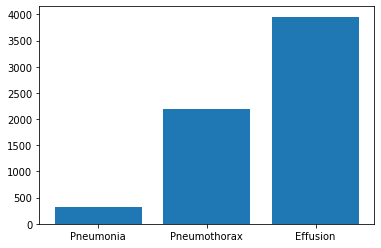

In [ ]:
plt.bar(["Pneumonia","Pneumothorax","Effusion"], only)

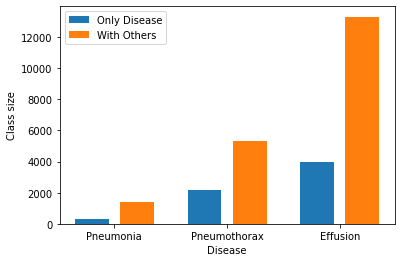

In [ ]:
X = ["Pneumonia","Pneumothorax","Effusion"]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, only, 0.3, label = 'Only Disease')
plt.bar(X_axis + 0.2, not_only, 0.3, label = 'With Others')
  
plt.xticks(X_axis, X)
plt.xlabel("Disease")
plt.ylabel("Class size")
plt.legend()
plt.show()

In [ ]:
sum(not_only)

20057

6685.666666666667

In [ ]:
len(pne.index.tolist())

1431

In [ ]:
index = pne.index.tolist()#.extend(thorax.index.tolist())#.extend(eff.index.tolist())
index.extend(thorax.index.tolist())
index.extend(eff.index.tolist())
index.extend(no.index.tolist())
len(index)

26550

In [ ]:
index = set(index)

In [ ]:
data = df[df.index.isin(index)].reset_index().drop("index", axis=1)
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00014879_006.png,Effusion|Pleural_Thickening,2,14879,61,M,AP,2500,2048,0.168,0.168
1,00008064_006.png,No Finding,6,8064,69,M,PA,2500,2048,0.168,0.168
2,00012278_004.png,No Finding,4,12278,67,F,AP,2500,2048,0.168,0.168
3,00009628_002.png,Effusion|Infiltration,2,9628,67,F,AP,2500,2048,0.168,0.168
4,00001580_000.png,Edema|Emphysema|Mass|Pneumothorax,0,1580,39,M,PA,2500,2048,0.171,0.171


In [ ]:
data.shape

(25258, 11)

In [ ]:
from sklearn.utils import shuffle

data = shuffle(data)
data.to_csv("dataset.csv", index=False)